In [46]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, StandardScaler


column_names = []
dataset = pd.read_csv('life_expectancy.csv')
# remove all empty spaces and remove all capital letters for ease of use and clearity. 
print(dataset)
dataset.rename(columns=(lambda x : x.strip().lower()), inplace=True)

# check the predictable column. 
print('-------- LIFE EXPECTANCY --------')
print(dataset['life expectancy'].describe())
print(' --------------------------------- ')
# this data has some outliers that might need to be regularized. 

# drop country from dataset. we want to generalize accross all countrys. 
dataset = dataset.drop(columns=['country'])
dataset = dataset.drop(columns=['status'])
print(dataset.info())

# create labels
labels = dataset['life expectancy']
# create features
features = dataset.iloc[:,0:len(dataset.columns)-1]

# collect a list of column names from features 
feature_column_names = []
for i in features:
    feature_column_names.append(i)

# Create a training set and validation set
f_train, f_test, l_train, l_test = train_test_split(features, labels, test_size=.2, random_state= 21)

# normalize the numerical data to be useful
ct = ColumnTransformer([('norm1', Normalizer(norm='l1'), feature_column_names)], remainder='passthrough')
f_train_scaled = ct.fit_transform(f_train)
f_test_scaled = ct.transform(f_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras import layers

learning_rate = 0.01

my_model = Sequential()
input = InputLayer(f_train.shape[1]) # number of input layers from the number of features
my_model.add(input) # added input layers 
my_model.add(layers.Dense(15, activation='relu'))
my_model.add(layers.Dense(15, activation='relu'))
my_model.add(layers.Dense(1))
opt = tf.keras.optimizers.Adam(learning_rate = learning_rate) #setting the learning rate of Adam to the one specified in the function parameter
my_model.compile(loss='mse', metrics=['mae'], optimizer=opt) # output parameters to look at
history = my_model.fit(f_train_scaled, l_train, epochs=100, batch_size=15, verbose=0, validation_data= (f_test_scaled, l_test))   
train_mse , train_mae = my_model.evaluate(f_train_scaled, l_train, verbose=0)
mse , mae = my_model.evaluate(f_test_scaled, l_test, verbose=0)
print(mse, mae)




          Country  Year      Status  Adult Mortality  infant deaths  Alcohol  \
0     Afghanistan  2015  Developing            263.0             62     0.01   
1     Afghanistan  2014  Developing            271.0             64     0.01   
2     Afghanistan  2013  Developing            268.0             66     0.01   
3     Afghanistan  2012  Developing            272.0             69     0.01   
4     Afghanistan  2011  Developing            275.0             71     0.01   
...           ...   ...         ...              ...            ...      ...   
2933     Zimbabwe  2004  Developing            723.0             27     4.36   
2934     Zimbabwe  2003  Developing            715.0             26     4.06   
2935     Zimbabwe  2002  Developing             73.0             25     4.43   
2936     Zimbabwe  2001  Developing            686.0             25     1.72   
2937     Zimbabwe  2000  Developing            665.0             24     1.68   

      percentage expenditure  Hepatitis

In [45]:
print(train_mse, train_mae)
print(mse, mae)

76.74507904052734 7.001851558685303
76.96604919433594 6.851736068725586


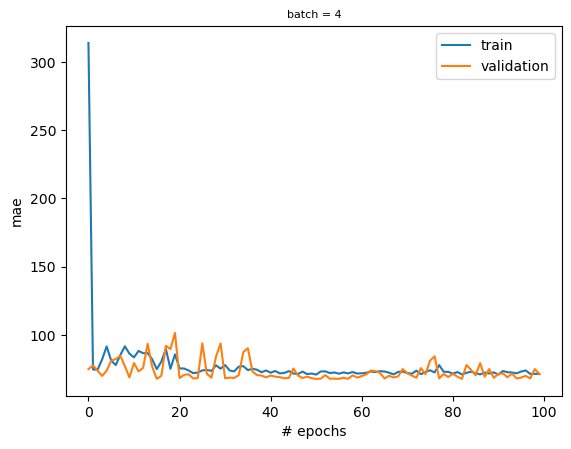

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('batch = 4', fontdict={'fontsize': 8, 'fontweight': 'medium'})
plt.xlabel('# epochs')
plt.ylabel('mae')
plt.legend()